In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#import cleaned data, we'll use the entire data set for EDA
data = pd.read_csv('clean_data.csv', header=0)

## Analysis Goals

The following are the questions we are trying to answer with the data set:

1) Where are the top fives places couples met that resulted in relationships that lasted the longest?

2) Does household income affect the length of the relationship?

3) Does religiosity affect the length of the relationship?

4) Do political leanings affect the length of the relationship?

5) Do differences in educational level affect the length of the relationship?

6) Does age difference between partners affect the length of the relationship?

**The exploratory data analysis in this workbook will help us answer these questions**

## Missing Values

Before we begin, let's check for missing values in the data set:

In [184]:
data.shape

(2925, 68)

In [185]:
data.describe(include=[np.number])

,Years_Together,First_Together,End_Year,Age_Diff,Age,P_Age
count,2925.000000,2925.000000,122.000000,2924.000000,2925.000000,2924.000000
mean,23.073162,1993.452308,2005.622951,4.210328,49.905641,49.660739
std,16.922354,17.028589,10.392566,4.847367,16.352541,16.362234
min,0.000000,1939.000000,1973.000000,0.000000,18.000000,16.000000
25%,9.000000,1980.000000,1999.000000,1.000000,36.000000,36.000000
50%,20.000000,1996.000000,2008.500000,3.000000,52.000000,51.000000
75%,36.000000,2008.000000,2014.000000,6.000000,62.000000,62.000000
max,78.000000,2017.000000,2017.000000,45.000000,93.000000,95.000000


In [186]:
data['Interracial_Couple'].value_counts()

no     2442
yes     461
Name: Interracial_Couple, dtype: int64

In [187]:
pd.set_option('display.max_columns', None)
data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,R_cowork,R_friend,R_family,R_sig_other,R_neighbor,P_cowork,P_friend,P_family,P_sig_other,P_neighbor,btwn_I_cowork,btwn_I_friend,btwn_I_family,btwn_I_sig_other,btwn_I_neighbor,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
count,2925,2925,2903,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2925
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,2041,830,2442,1088,686,1498,390,2140,2345,561,846,2463,2656,2815,2901,2874,2901,2905,2908,2914,2906,2909,2917,2916,2915,2851,2406,2182,2595,2817,2709,2419,2199,2619,2815,2734,2851,2835,2849,2816,2856,2549,2628,2791,2684,2694,2679,2280,2570,2774,2695,2821,2848,2827,2853,2749,2760,2818,2833,2852,2823,2598


We see that the total counts for "End_Year", "Age_Diff", "P_Age", "Interracial_Couple" and the various categories for dating locations are less than 2925, the total number of entries in the cleaned data set. Let's account for these missing values by doing some data imputing.

In [188]:
#create a copy of the data and call it t_data
t_data = data.copy()
#impute missing value with column mean from Age_Diff
p_age_diff_mean = t_data['Age_Diff'].mean()
#isolate row with NaN value
t_data[t_data.P_Age.isna()]

,Married,Years_Together,First_Together,End_Year,Religious_Attendance,Interracial_Couple,Age_Diff,Age,P_Age,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,R_cowork,R_friend,R_family,R_sig_other,R_neighbor,P_cowork,P_friend,P_family,P_sig_other,P_neighbor,btwn_I_cowork,btwn_I_friend,btwn_I_family,btwn_I_sig_other,btwn_I_neighbor,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
227,"No, I am not Married",2.0,2005.0,2007.0,Once or twice a month,no,NaN,67,NaN,Less than high school,"Some college, no degree",Female,"$50,000 to $59,999","Black, Non-Hispanic",Black or African American,Undecided/Independent/Other,Refused,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [189]:
#Change NaN value of P_Age to mean, round to nearest integer, update Age_Diff
t_data.loc[227,'Age_Diff'] = round(p_age_diff_mean, 0)
t_data.loc[227, 'P_Age'] = t_data.loc[227, 'Age'] + round(p_age_diff_mean, 0)
#check updated values
t_data.loc[227, ['Age_Diff', 'P_Age']]

Age_Diff     4
P_Age       71
Name: 227, dtype: object

In [190]:
t_data["Interracial_Couple"].value_counts()

no     2442
yes     461
Name: Interracial_Couple, dtype: int64

In [191]:
#Replace all NaN in Interracial_Couple with the most frequent answer
t_data.loc[(t_data.Interracial_Couple.isna()),'Interracial_Couple'] = 'no'
#check updated values
t_data["Interracial_Couple"].value_counts()

no     2464
yes     461
Name: Interracial_Couple, dtype: int64

In [192]:
#check if all columns, except dating locations, have their NaN values replaced
t_data.describe(include=np.number)

,Years_Together,First_Together,End_Year,Age_Diff,Age,P_Age
count,2925.000000,2925.000000,122.000000,2925.000000,2925.000000,2925.000000
mean,23.073162,1993.452308,2005.622951,4.210256,49.905641,49.668034
std,16.922354,17.028589,10.392566,4.846540,16.352541,16.364193
min,0.000000,1939.000000,1973.000000,0.000000,18.000000,16.000000
25%,9.000000,1980.000000,1999.000000,1.000000,36.000000,36.000000
50%,20.000000,1996.000000,2008.500000,3.000000,52.000000,51.000000
75%,36.000000,2008.000000,2014.000000,6.000000,62.000000,62.000000
max,78.000000,2017.000000,2017.000000,45.000000,93.000000,95.000000


In [193]:
t_data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,R_cowork,R_friend,R_family,R_sig_other,R_neighbor,P_cowork,P_friend,P_family,P_sig_other,P_neighbor,btwn_I_cowork,btwn_I_friend,btwn_I_family,btwn_I_sig_other,btwn_I_neighbor,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
count,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2858,2925
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,2041,830,2464,1088,686,1498,390,2140,2345,561,846,2463,2656,2815,2901,2874,2901,2905,2908,2914,2906,2909,2917,2916,2915,2851,2406,2182,2595,2817,2709,2419,2199,2619,2815,2734,2851,2835,2849,2816,2856,2549,2628,2791,2684,2694,2679,2280,2570,2774,2695,2821,2848,2827,2853,2749,2760,2818,2833,2852,2823,2598



We have filled in the missing data. We should not drop the entries without dating location during the EDA, because we want to preserve the trends and relationship present in the original data as much as possible. We can consider dropping these entries in the future when building predictive models for classification.

## Can meeting venues dictate the strength of a relationship?

**Moving on, we want to investigate the first question:**

1) Where are the top fives places couples met that resulted in relationships that lasted the longest?

In [194]:
#collect venue columns as a single column called places
places = t_data.columns[list(data.columns).index('R_cowork')::]

In [195]:
t_data[places]

,R_cowork,R_friend,R_family,R_sig_other,R_neighbor,P_cowork,P_friend,P_family,P_sig_other,P_neighbor,btwn_I_cowork,btwn_I_friend,btwn_I_family,btwn_I_sig_other,btwn_I_neighbor,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
0,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes
2,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
3,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no
4,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2921,no,no,yes,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2922,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2923,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes


In [196]:
#convert yes or no answers to 0 and 1, combine these results as the new column 'met_places'
p_cols = t_data[places].copy()
p_cols = p_cols.replace({'yes': 1, 'no': 0})
#use idxmax to identify 'yes' i.e. 1
p_cols = p_cols.idxmax(axis=1).copy()
t_data['places_met'] = p_cols

In [197]:
#displays the unique places/situations where couples met
t_data['places_met'].unique()

array(['R_cowork', 'bar_restaurant', 'R_neighbor', 'R_friend', 'school',
       'customer', 'internet_chat', 'R_family', 'work_neighbors',
       'P_family', 'P_friend', 'party', 'college', 'public',
       'R_sig_other', 'vol_org', 'church', 'single_serve_nonint',
       'met_online', 'internet_dating', 'internet_other', 'mil',
       'internet_game', 'internet_org', 'internet_soc_network',
       'blind_date', 'vacation', 'P_sig_other', 'P_cowork',
       'business_trip', 'P_neighbor'], dtype=object)

In [198]:
#group Years_Together by places_met, sort values, separate data by age group
young_t_data = t_data[t_data['Age'] < 36].copy()
young_t_data = young_t_data.rename(columns={'places_met': 'Young_places_met'})
old_t_data = t_data[t_data['Age'] >= 36].copy()
old_t_data = old_t_data.rename(columns={'places_met': 'Old_places_met'})

print(f'The number of entries age 35 or less: {young_t_data.shape[0]}', sep='\n')
print(f'The number of entries age 36 or greater: {old_t_data.shape[0]}', sep='\n')

y_place_effect = young_t_data.groupby('Young_places_met').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
o_place_effect = old_t_data.groupby('Old_places_met').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
#display output tables
display(y_place_effect.head(10), o_place_effect.head(10))

# css = """
# .output {
#     flex-direction: row;
# }
# """
# display(y_place_effect.head(10))
# display(o_place_effect.head(10))

# HTML('<style>{}</style>'.format(css))

The number of entries age 35 or less: 711
The number of entries age 36 or greater: 2214


,count,min,median,max,mean
Young_places_met,,,,,
R_friend,190,0.0,8.0,28.0,8.273684
R_cowork,111,0.0,7.0,28.0,7.270270
school,67,1.0,11.0,23.0,10.716418
bar_restaurant,60,0.0,2.0,28.0,4.433333
college,45,1.0,9.0,21.0,8.400000
R_family,33,0.0,9.0,22.0,8.636364
internet_dating,32,0.0,1.5,13.0,2.625000
R_neighbor,25,0.0,11.0,23.0,9.680000
met_online,19,0.0,9.0,35.0,9.684211


,count,min,median,max,mean
Old_places_met,,,,,
R_cowork,485,0.0,27.0,59.0,26.828866
R_friend,468,0.0,30.0,78.0,30.683761
R_family,199,0.0,32.0,67.0,31.492462
bar_restaurant,175,0.0,17.0,58.0,19.502857
school,118,4.0,43.0,69.0,41.500000
college,85,14.0,36.0,69.0,36.647059
customer,84,0.0,23.0,54.0,22.666667
church,78,0.0,23.5,63.0,25.166667
R_neighbor,72,2.0,28.5,71.0,31.819444


Regardless of age aroup, it appears that most people do not meet their partners at venues, but through their social circle. The most common way respondents meet dating partners is through their own social circle. The only venues that reached the top 5 spots are bars/restaurants and educational institutions, and the mean relationship length of couples that met in school is the longest at ~40 years for older respondents and ~11 years for those who are younger. Let's discount these meetings through social circles for now and focus solely on meetings at venues.

In [199]:
#aggregate respondent, partner and intermediate social scenarios as 'social circle'
r_soc = []
p_soc = []
for item in list(t_data['places_met'].unique()):
    if "R_" in item:
        r_soc.append(item)
    elif "P_" in item:
        p_soc.append(item)
for i in range(len(r_soc)):
    t_data = t_data.replace({'places_met': {r_soc[i]: 'R_soc_circle'}})
    t_data = t_data.replace({'places_met': {p_soc[i]: 'P_soc_circle'}})
#'customer' should be added to R_soc_circle
t_data = t_data.replace({'places_met': {'customer': 'R_soc_circle'}})

In [200]:
#update the groupby tables
young_t_data = t_data[t_data['Age'] < 36].copy()
young_t_data = young_t_data.rename(columns={'places_met': 'Young_places_met'})
old_t_data = t_data[t_data['Age'] >= 36].copy()
old_t_data = old_t_data.rename(columns={'places_met': 'Old_places_met'})

#group Years_Togther by places_met, sort values with the function below
def get_places_only(data, age_grp, emphasis):
    if emphasis == 'longevity':
        places_only = data[~data.isin(['R_soc_circle', 'P_soc_circle'])].groupby(age_grp + '_places_met').Years_Together.agg([
            'count','min','median','max','mean']).sort_values(by=['mean','count'], ascending=False)
    else:
        places_only = data[~data.isin(['R_soc_circle', 'P_soc_circle'])].groupby(age_grp + '_places_met').Years_Together.agg([
            'count','min','median','max','mean']).sort_values(by=['count','mean'], ascending=False)
    return places_only

y_place_effect = get_places_only(young_t_data, 'Young', 'popularity')
o_place_effect = get_places_only(old_t_data, 'Old', 'popularity')

#display output tables
display(y_place_effect.head(10), o_place_effect.head(10))


,count,min,median,max,mean
Young_places_met,,,,,
school,67,1.0,11.0,23.0,10.716418
bar_restaurant,60,0.0,2.0,28.0,4.433333
college,45,1.0,9.0,21.0,8.400000
internet_dating,32,0.0,1.5,13.0,2.625000
met_online,19,0.0,9.0,35.0,9.684211
internet_other,18,0.0,2.0,9.0,3.055556
church,14,1.0,12.0,24.0,10.928571
internet_soc_network,12,0.0,4.0,9.0,4.166667
public,10,1.0,7.5,17.0,8.200000


,count,min,median,max,mean
Old_places_met,,,,,
bar_restaurant,175,0.0,17.0,58.0,19.502857
school,118,4.0,43.0,69.0,41.500000
college,85,14.0,36.0,69.0,36.647059
church,78,0.0,23.5,63.0,25.166667
public,68,0.0,20.0,63.0,24.411765
met_online,48,3.0,25.0,69.0,26.500000
internet_other,41,0.0,7.0,53.0,8.853659
internet_dating,41,0.0,5.0,32.0,7.390244
party,31,0.0,27.0,60.0,28.451613


The top five most popular venues in which respondents meet their partners are slightly different based on the age group of the correspondents. For the younger respondents, the top 5 are:
   
   1. Schools
   2. Bars/restaurants
   3. Colleges
   4. Internet dating
   5. Online

For the older respondents:

   1. Bars/restaurants
   2. Schools
   3. Colleges
   4. Church
   5. In public
   
It is interesting to note that for those age 35 and below, chance meetings at church events and in public have been supplanted by those that occured online, either through online dating services or online communities. However, schools, colleges and bars remain the most popular options for singles to meet potential partners regardless of their age.

In [201]:
y_place_effect = get_places_only(young_t_data, 'Young', 'longevity')
o_place_effect = get_places_only(old_t_data, 'Old', 'longevity')

#display output tables
display(y_place_effect.head(5), o_place_effect.head(5))

,count,min,median,max,mean
Young_places_met,,,,,
vacation,2,13.0,14.0,15.0,14.000000
church,14,1.0,12.0,24.0,10.928571
school,67,1.0,11.0,23.0,10.716418
internet_chat,9,0.0,12.0,15.0,10.000000
internet_game,5,6.0,10.0,15.0,10.000000


,count,min,median,max,mean
Old_places_met,,,,,
school,118,4.0,43.0,69.0,41.500000
mil,25,10.0,39.0,56.0,38.400000
blind_date,14,14.0,46.5,62.0,37.285714
college,85,14.0,36.0,69.0,36.647059
party,31,0.0,27.0,60.0,28.451613


Not accounting for the popularity of responses, the top five most venues at which couples meet and form the longest lasting relationships also varied based on age group.

For the younger respondents, those who met in church and school have the longest lasting relationships, approaching 11 years. Certain categories, such as vacation and online meetings also produced long-lasting relationships, but the relative size of these populations makes them potential outliers.

For the older respondents, those who met in school and college have the longest lasting relationships, averaging 37 years or greater. Other categories, such as meetings in the military or on blind dates also produced long-lasting relationships, but these populations are much smaller. 

In [202]:
#display output tables
display(y_place_effect.tail(5), o_place_effect.tail(5))

,count,min,median,max,mean
Young_places_met,,,,,
internet_soc_network,12,0.0,4.0,9.0,4.166667
mil,4,2.0,3.5,7.0,4.000000
internet_other,18,0.0,2.0,9.0,3.055556
internet_dating,32,0.0,1.5,13.0,2.625000
single_serve_nonint,1,2.0,2.0,2.0,2.000000


,count,min,median,max,mean
Old_places_met,,,,,
internet_other,41,0.0,7.0,53.0,8.853659
internet_dating,41,0.0,5.0,32.0,7.390244
internet_soc_network,7,0.0,8.0,11.0,6.000000
internet_game,3,1.0,6.0,10.0,5.666667
internet_org,2,3.0,4.0,5.0,4.000000


For both younger and older respondents, the bottom five scenarios in which couples meet and form long-lasting relationships mostly took place under an internet setting, with the mean length of relationships lasting between 4 and 9 years, indicating that relationships formed over internet encounters are likely to be around 2 to 4 times shorter compared to those formed during physical encounters. It appears that the internet is not an ideal platform to form long-lasting romantic relationships.

### Question 1 Results: 

- Generally speaking, it appears that the most popular places or situations in which couples with long lasting relationships met are either at school or at college. Variations do exist between age groups, and thus any predictive model that aims to predict the longevity of a relationship based on where couples met (or vice versa, predicting where they met based on longevity) must account for age group differences.    

    
- Couples met via the internet have the most short-lived relationships on average, regardless of the internet media used and regardless of age group.

## Does money make love endure?

2) Does household income affect the length of the relationship?

In [203]:
income_effect = data.groupby('Household_Income').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
income_effect

,count,min,median,max,mean
Household_Income,,,,,
"$100,000 to $124,999",390,0.0,23.5,69.0,24.841026
"$60,000 to $74,999",290,0.0,18.0,66.0,21.875862
"$50,000 to $59,999",236,0.0,21.0,69.0,23.826271
"$125,000 to $149,999",200,0.0,24.0,62.0,24.195000
"$85,000 to $99,999",197,0.0,20.0,64.0,23.248731
"$75,000 to $84,999",196,0.0,24.5,68.0,25.964286
"$40,000 to $49,999",185,0.0,16.0,68.0,21.918919
"$150,000 to $174,999",184,0.0,25.5,64.0,26.081522
"$35,000 to $39,999",125,0.0,17.0,71.0,21.848000


It seems like household income is a good predictor of relationship length, up until maybe 30,000 per household. Let's convert household income into ordinal form to enhance the clarity of any trends.

In [204]:
hh_labels = data['Household_Income'].unique()
#leave out the first (<$5,000) and last elements ($250,000), create a dictionary for the middle elements
inc_dict = {}

for l in hh_labels:
    if ' to ' in l:
        k = int(l[0:l.find(' to ',0)].replace('$','').replace(',',''))
        inc_dict[l] = k
inc_dict_val = sorted(list(inc_dict.values()))

for l in hh_labels:
    if ' to ' in l:
        inc_dict[l] = inc_dict_val.index(inc_dict[l]) + 1
    
inc_dict['Less than $5,000'] = 0
inc_dict['$250,000 or more'] = len(hh_labels) - 1
inc_dict

{'$150,000 to $174,999': 17,
 '$200,000 to $249,999': 19,
 '$175,000 to $199,999': 18,
 '$75,000 to $84,999': 13,
 '$50,000 to $59,999': 11,
 '$60,000 to $74,999': 12,
 '$85,000 to $99,999': 14,
 '$100,000 to $124,999': 15,
 '$20,000 to $24,999': 6,
 '$40,000 to $49,999': 10,
 '$15,000 to $19,999': 5,
 '$30,000 to $34,999': 8,
 '$10,000 to $12,499': 3,
 '$25,000 to $29,999': 7,
 '$5,000 to $7,499': 1,
 '$125,000 to $149,999': 16,
 '$35,000 to $39,999': 9,
 '$12,500 to $14,999': 4,
 '$7,500 to $9,999': 2,
 'Less than $5,000': 0,
 '$250,000 or more': 20}

In [205]:
#convert 'Household_Income' to ordinal numeric form
data = data.replace({'Household_Income': inc_dict})
income_effect = data.groupby('Household_Income').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['mean'], ascending=False)

In [206]:
income_effect.sort_index(ascending=False)

,count,min,median,max,mean
Household_Income,,,,,
20,105,0.0,21.0,62.0,24.609524
19,102,0.0,24.5,63.0,25.107843
18,120,0.0,26.5,78.0,27.125000
17,184,0.0,25.5,64.0,26.081522
16,200,0.0,24.0,62.0,24.195000
15,390,0.0,23.5,69.0,24.841026
14,197,0.0,20.0,64.0,23.248731
13,196,0.0,24.5,68.0,25.964286
12,290,0.0,18.0,66.0,21.875862


R-square:  0.796


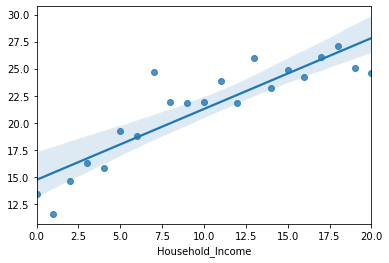

In [207]:
from sklearn.linear_model import LinearRegression
#create dict to store regression R-square values
q_score = {}

#perform linear regression
X = income_effect.index.to_numpy().reshape(-1,1)
y = income_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[2] = reg.score(X,y)
print(f'R-square: {q_score[2]: 0.3f}')
sns.regplot(y=y, x=income_effect.index)
plt.show()

A linear regression provides a decent fit of the relationship, but by observing both the data points and the fitted curve, we realize there is some degree of underfitting. Try a order 2 polynomial regression instead.

R-square:  0.898


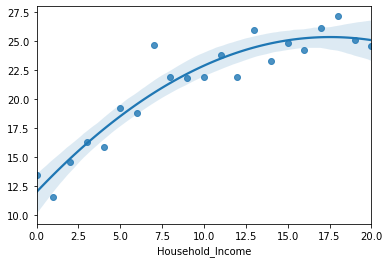

In [208]:
X = pd.DataFrame(list(income_effect.index))
X2  = pd.Series([x**2 for x in list(income_effect.index)])
X = pd.concat([X, X2], axis=1)
y = income_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[2] = reg.score(X,y)
print(f'R-square: {q_score[2]: 0.3f}')
sns.regplot(y=y, x=income_effect.index, order=2)
plt.show()

The second order polynomial regression provides a better fit. We can take the derivative of the fitted curve to figure out the optimum income bracket for long-lasting relationships.

In [209]:
#find the minimum by setting 2ax+b = 0
reg_coef = reg.coef_[0]
X_min = -reg_coef[0]/(2*reg_coef[1])
X_min

17.53313804181286

In [210]:
#The numeric value that gives the minimum point is 17 in 'Household_Income' is:
for k in inc_dict:
    if inc_dict[k] == 17:
        print(k)

$150,000 to $174,999


### Question 2 results:
The longevity of relationship increases with increasing income up until the income bracket of "150,000 to 174,999". Beyond 174,999, the longevity of relationship actually decreases, indicating that "150,000 to 174,999" is likely the sweet spot for an income bracket that maximize relationship longevity.

In [211]:
religion_effect = data.groupby('Religious_Attendance').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
religion_effect

,count,min,median,max,mean
Religious_Attendance,,,,,
Never,830,0.0,15.0,69.0,19.596386
Once a week,567,0.0,27.0,78.0,27.631393
Once a year or less,553,0.0,18.0,65.0,21.755877
A few times a year,484,0.0,21.0,68.0,23.055785
Once or twice a month,251,0.0,17.0,69.0,21.282869
More than once a week,235,1.0,29.0,68.0,29.391489
Refused,5,3.0,25.0,46.0,23.600000


We want to convert religious attendance to an ordinal numeric form, with "More than one a week" being 0, and "Never" being 5. Observing that the category "Refused" has a very small population (~5), and its mean is very close to that of the category "A few times a year", let's reclassify "Refused" to "A few times a year".  

In [212]:
data = data.replace({'Religious_Attendance': {'Refused': 'A few times a year'}})
rel_dict = {'More than once a week': 0, 'Once a week': 1, 'Once or twice a month': 2, 
           'A few times a year': 3, 'Once a year or less': 4, 'Never': 5}
data = data.replace({'Religious_Attendance': rel_dict})
religion_effect = data.groupby('Religious_Attendance').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
religion_effect.sort_index()

,count,min,median,max,mean
Religious_Attendance,,,,,
0,235,1.0,29.0,68.0,29.391489
1,567,0.0,27.0,78.0,27.631393
2,251,0.0,17.0,69.0,21.282869
3,489,0.0,21.0,68.0,23.061350
4,553,0.0,18.0,65.0,21.755877
5,830,0.0,15.0,69.0,19.596386


R-square:  0.804


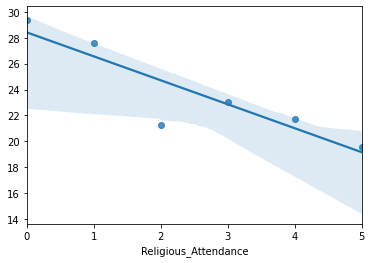

In [213]:
X = religion_effect.index.to_numpy().reshape(-1,1)
y = religion_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[3] = reg.score(X,y)
print(f'R-square: {q_score[3]: 0.3f}')
sns.regplot(y=y, x=religion_effect.index)
plt.show()

### Question 3 results:
The longevity of relationship decreases with decreasing religious attendance. Couple that are most pious tend to stay together the longest.

In [214]:
pol_effect = data.groupby('Politics').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
pol_effect

,count,min,median,max,mean
Politics,,,,,
Strong Democrat,561,0.0,19.0,68.0,22.429590
Leans Democrat,558,0.0,15.5,69.0,20.145161
Leans Republican,515,0.0,22.0,71.0,24.724272
Strong Republican,436,0.0,28.0,68.0,28.075688
Not Strong Democrat,404,0.0,15.0,69.0,18.816832
Not Strong Republican,372,0.0,24.5,78.0,25.741935
Undecided/Independent/Other,79,0.0,13.0,61.0,19.151899


In [215]:
pol_dict = {'Strong Republican': 0, 'Leans Republican': 1, 'Not Strong Republican': 2,
           'Undecided/Independent/Other': 3, 'Not Strong Democrat': 4, 'Leans Democrat': 5,
            'Strong Democrat': 6}

In [216]:
#we want to convert political affiliation to an ordinal numeric form, for both the features 'Politics' and 'P_Politics'
data = data.replace({'Politics': pol_dict})
data = data.replace({'P_Politics': pol_dict})
data.groupby('P_Politics').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
P_Politics,,,,,
3,846,0.0,15.0,69.0,19.206856
0,484,0.0,30.0,69.0,29.037190
6,454,0.0,21.0,68.0,23.748899
5,419,0.0,18.0,66.0,20.582339
1,373,0.0,23.0,71.0,25.292225
4,180,0.0,23.0,67.0,24.150000
2,149,0.0,23.0,78.0,24.657718
Refused,20,0.0,11.5,46.0,16.250000


Observing that the category "Refused" has a very small population (14), and its mean is very close to that of the category 3, let's reclassify "Refused" to category 3. Category 3 represents a substantial difference between the political views of the survey respondent and the respondent's partner.

In [217]:
data = data.replace({'P_Politics': {'Refused': 3}})

In [218]:
pol_col = abs(data.Politics - data.P_Politics)
# pol_col
data.insert(loc=8, column='Pol_Diff', value=pd.Series(pol_col))
pol_effect = data.groupby('Pol_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
pol_effect

,count,min,median,max,mean
Pol_Diff,,,,,
0,951,0.0,26.0,78.0,26.730810
1,802,0.0,18.0,69.0,21.539900
2,756,0.0,17.0,69.0,21.805556
3,213,0.0,17.0,55.0,19.126761
4,126,0.0,20.5,64.0,22.587302
5,57,0.0,13.0,64.0,18.842105
6,20,0.0,15.0,58.0,15.700000


R-square:  0.700


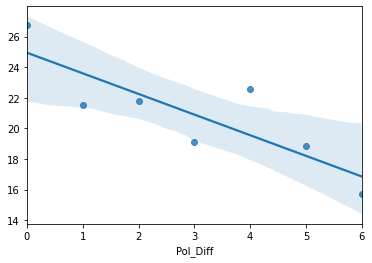

In [219]:
X = pol_effect.index.to_numpy().reshape(-1,1)
y = pol_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[4] = reg.score(X,y)
print(f'R-square: {q_score[4]: 0.3f}')
sns.regplot(y=y, x=pol_effect.index)
plt.show()

### Question 4 results:
The longevity of relationship decreases with increasing political differences. Couple with the most polarized position in politics (Category 6) have relationships that are approximately 10 years shorter than average compared to those who are in complete political alignment (Category 0).

In [220]:
edu_effect = data.groupby('Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
Education,,,,,
Bachelor's degree or higher,1088,0.0,19.0,78.0,22.152574
Some college,862,0.0,19.0,69.0,22.064965
High school,756,0.0,24.0,71.0,25.940476
Less than high school,219,0.0,20.0,67.0,21.716895


In [221]:
edu_effect = data.groupby('P_Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
P_Education,,,,,
HS graduate or GED,686,0.0,21.0,71.0,23.858601
Bachelors degree,647,0.0,16.0,65.0,21.205564
"Some college, no degree",632,0.0,19.0,65.0,22.814873
Masters degree,339,0.0,23.0,78.0,24.746313
Associate degree,296,0.0,21.0,69.0,22.844595
Professional or Doctorate degree,137,0.0,21.0,64.0,24.992701
12th grade no diploma,83,0.0,19.0,63.0,23.108434
10th grade,26,2.0,19.0,43.0,21.538462
11th grade,25,1.0,19.0,56.0,23.280000


We have a lot more categories for the education level of partners compared to the respondents. For the sake of simplifying the analysis, let's recategorize every option from 12th grade and below to be "Less than high school". We also want to categorize associate's degree as "Some college", and categorize master and PhDs to be "Bachelor's degree or higher"

In [222]:
p_edu_list = list(data['P_Education'].unique())
p_edu_dict = {x: 'Less than high school' for x in p_edu_list[p_edu_list.index('12th grade no diploma'):]}
p_edu_dict[p_edu_list[0]] = 'High school'
for i in [2, 4]:
    p_edu_dict[p_edu_list[i]] = 'Some college'
for i in [1, 3, 5]:
    p_edu_dict[p_edu_list[i]] = 'Bachelor\'s degree or higher'
p_edu_dict

{'12th grade no diploma': 'Less than high school',
 '11th grade': 'Less than high school',
 '10th grade': 'Less than high school',
 '7th or 8th grade': 'Less than high school',
 'No formal education': 'Less than high school',
 '9th grade': 'Less than high school',
 'Refused': 'Less than high school',
 '5th or 6th grade': 'Less than high school',
 '1st-4th grade': 'Less than high school',
 'Master\x92s degree': 'High school',
 'Bachelor\x92s degree': 'Some college',
 'Professional or Doctorate degree': 'Some college',
 'Associate degree': "Bachelor's degree or higher",
 'Some college, no degree': "Bachelor's degree or higher",
 'HS graduate or GED': "Bachelor's degree or higher"}

In [223]:
data = data.replace({'P_Education': p_edu_dict})
data.groupby('P_Education').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
P_Education,,,,,
Bachelor's degree or higher,1614,0.0,20.5,71.0,23.263941
Some college,784,0.0,18.0,65.0,21.867347
High school,339,0.0,23.0,78.0,24.746313
Less than high school,188,0.0,19.5,66.0,23.446809


In [224]:
#convert educational categories to ordinal form, create a new feature called 'Edu_Diff'
edu_cat_dict = {'Bachelor\'s degree or higher': 0, 'Some college': 1, 'High school': 2, 'Less than high school': 3}
data = data.replace({'Education': edu_cat_dict})
data = data.replace({'P_Education': edu_cat_dict})
edu_col = abs(data.Education - data.P_Education)
data.insert(loc=8, column='Edu_Diff', value=pd.Series(edu_col))
edu_effect = data.groupby('Edu_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
edu_effect

,count,min,median,max,mean
Edu_Diff,,,,,
1,1260,0.0,19.0,69.0,22.153968
2,891,0.0,23.0,78.0,25.210999
0,613,0.0,19.0,66.0,22.189233
3,161,0.0,21.0,67.0,21.801242


R-square:  0.024


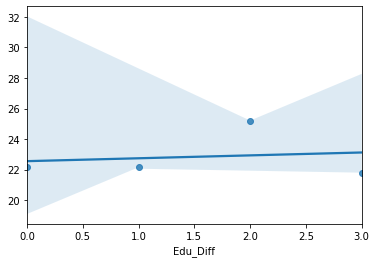

In [225]:
X = edu_effect.index.to_numpy().reshape(-1,1)
y = edu_effect['mean'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X, y)
q_score[5] = reg.score(X,y)
print(f'R-square: {q_score[5]: 0.3f}')
sns.regplot(y=y, x=edu_effect.index)
plt.show()

### Question 5 results:
Broadly speaking, it appears that differences in educational level between partner has negligible effect on the longevity of relationships. However, we do notice from the analysis obtained with the initial P_Education feature, that respondents with partners that are overwhelming less educated tend to have longer relationships on average. This is rather intuitive given that a large difference in educational level may imply that one party is very likely more financially depend on the other, thus discouraging the more dependent party from ending the relationship. However, more granularity in the feature 'Education' is required to verify this hypothesis.

In [226]:
#eliminate any NaN elements due to the absolute subtraction of 'Age' from 'P_Age'
data = data[data['Age_Diff'].notna()]
data.Age_Diff.unique()

array([ 3.,  2.,  0.,  1., 10.,  4.,  6.,  9.,  5., 14., 13., 27.,  7.,
       24., 18., 30.,  8., 12., 23., 39., 40., 25., 16., 17., 45., 11.,
       38., 15., 32., 19., 35., 21., 36., 31., 20., 26., 22.])

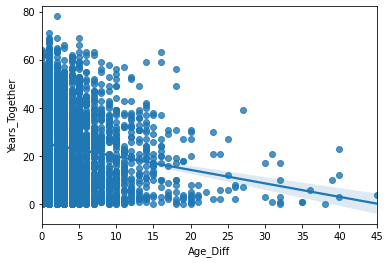

In [227]:
sns.regplot(y=data['Years_Together'], x=data['Age_Diff'])
plt.show()

In [228]:
from sklearn.linear_model import LinearRegression
X = data['Age_Diff'].to_numpy().reshape(-1,1)
y = data['Years_Together'].to_numpy().reshape(-1,1)
# data['Age_Diff'].unique()
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.025670501558749836

The scatterplot above shows very minor correlation between 'Years_Together' and 'Age_Diff'. However, this likely because a large number of data plots are overlapping. Create a swarm plot to verify

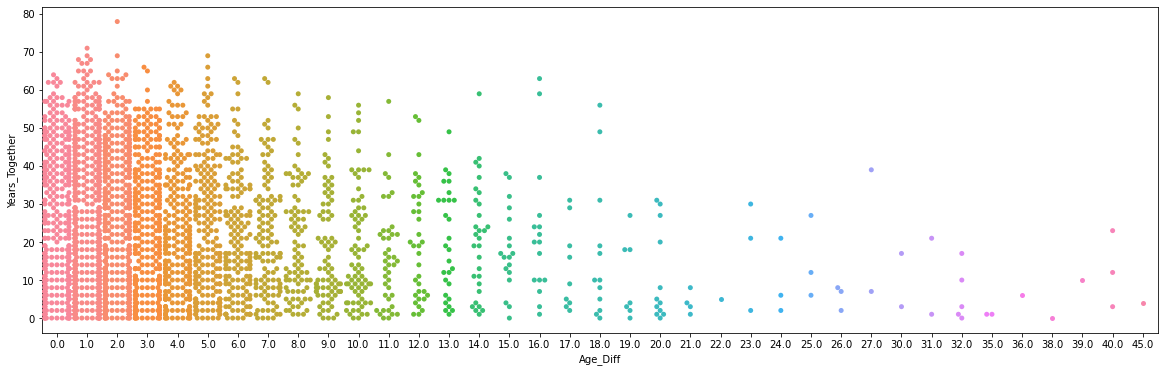

In [229]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='Age_Diff', y='Years_Together', data=data)
plt.show()

As expected, a large number of data points are overlapping for the values 0 through 7 for the feature 'Age_Diff'. We need to group the data points by age difference and analyze how the mean of 'Years_Together' changes with 'Age_Diff'.

In [230]:
age_diff_effect = data.groupby('Age_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)
age_diff_effect

,count,min,median,max,mean
Age_Diff,,,,,
1.0,589,0.0,22.0,71.0,25.393888
2.0,460,0.0,24.0,78.0,24.884783
0.0,362,0.0,21.0,64.0,24.638122
3.0,308,0.0,23.0,66.0,24.100649
4.0,248,0.0,19.0,62.0,21.866935
5.0,208,0.0,22.5,69.0,24.235577
6.0,153,0.0,17.0,63.0,20.777778
7.0,114,0.0,19.5,63.0,21.385965
8.0,84,1.0,17.5,59.0,20.607143


R-square:  0.662


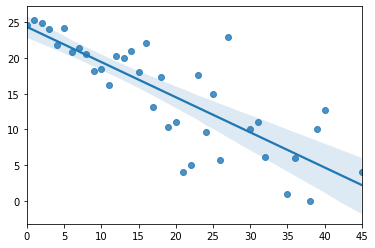

In [231]:
from sklearn.linear_model import LinearRegression
X = age_diff_effect.index.to_numpy().reshape(-1,1)
y = age_diff_effect['mean'].to_numpy().reshape(-1,1)
# data['Age_Diff'].unique()
reg = LinearRegression().fit(X, y)
q_score[6] = reg.score(X,y)
print(f'R-square: {q_score[6]: 0.3f}')
sns.regplot(y=y, x=X)
plt.show()

### Question 6 results:
Generally, it appears that as the age difference between the correspondent and the partner increases, the longevity of their relationship decreases.

## Consolidation of EDA results:

We now consolidate our EDA findings, and finalize the features that we can use for a machine learning model that can predict the number of years a couple in a given training example will stay in a relationship.

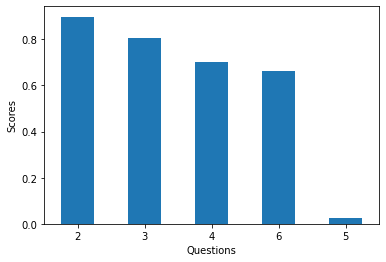

In [232]:
qns_x = [x for x in range(2,7)]
scores_y = [q_score[x] for x in qns_x]
scores = pd.Series(data=scores_y, index=qns_x)
scores.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Questions')
plt.xticks(rotation=0)
plt.ylabel('Scores')
plt.show()

### EDA results:

It appears that the old adage of "No Money, No Honey" is true. Household income is the strongest regression predictor of longevity in relationship, followed closely by religious attendance, political differences, and lastly, age differences. Educational level, with the exception of cases where the differences are extreme, is rather insignificant as a regression predictor.

Next, we want to make some predictions. We can use a regression analysis from the answers to Questions 2 through 5, to predict how long a couple, given as a training example, would stay in relationship. Using that result, we can use the answer from Question 1 to predict where the couple most likely first met. A random forest model, which can be used for both classification and regression analysis, is a good starting point.